In [3]:
from collections import Counter

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
from imblearn.over_sampling import SMOTE

In [19]:
from sklearn.metrics import classification_report

In [10]:
import matplotlib.pyplot as plt

In [128]:
iris = load_iris()
X, y = make_imbalance(iris.data, iris.target,
                      sampling_strategy={0: 10, 1: 50, 2: 50}, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=32)

print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

# Create a pipeline
pipeline = make_pipeline(SMOTE(),
                         LinearSVC(random_state=42))
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report(y_test, pipeline.predict(X_test)))

Training target statistics: Counter({2: 38, 1: 35, 0: 9})
Testing target statistics: Counter({1: 15, 2: 12, 0: 1})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.93      0.87      0.90        15
           2       0.85      0.92      0.88        12

   micro avg       0.89      0.89      0.89        28
   macro avg       0.92      0.93      0.93        28
weighted avg       0.90      0.89      0.89        28



/Users/aleksandrkondraskin/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [56]:
Counter(iris.target)

Counter({0: 50, 1: 50, 2: 50})

(array([15.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0., 37.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

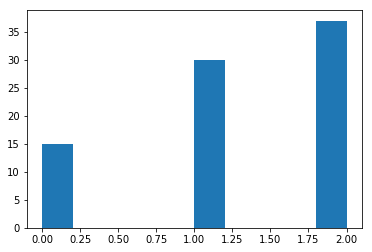

In [31]:
plt.hist(y_train)